In [10]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

sns.set()
pd.set_option('max_columns', 1000)
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
train=pd.read_csv("C:/Users/Darshika Rajasekaran/Documents/rf_input.csv")

In [105]:
train

,BLOCK,LOT,ZIP.CODE,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,SALE.PRICE,bc_a_series,bc_b_series,bc_c_series,bc_d_series,bc_e_series,bc_f_series,bc_g_series,bc_h_series,bc_i_series,bc_j_series,bc_k_series,bc_l_series,bc_m_series,bc_n_series,bc_o_series,bc_p_series,bc_q_series,bc_r_series,bc_s_series,bc_t_series,bc_v_series,bc_w_series,bc_Y_series,bc_Z_series,bc_a_sell_series,bc_b_sell_series,bc_c_sell_series,bc_d_sell_series,bc_i_sell_series,bc_j_sell_series,bc_k_sell_series,bc_l_sell_series,bc_m_sell_series,bc_n_sell_series,bc_o_sell_series,bc_p_sell_series,bc_q_sell_series,bc_r_sell_series,bc_s_sell_series,bc_t_sell_series,bc_v_sell_series,bc_w_sell_series,bc_Y_sell_series,bc_Z_sell_series,Manhattan_neigbourhood,Brooklyn_neighborhood,Queens_Neighborhood,The_Bronx_neigbourhood,Staten_Island_neigbourhood,sale_month,sale_year,sale_day,tax_class_at_present_1,tax_class_at_present_1A,tax_class_at_present_1B,tax_class_at_present_1C,tax_class_at_present_2,tax_class_at_present_2A,tax_class_at_present_2B,tax_class_at_present_2C,tax_class_at_present_4,tax_class_sale_time_1,tax_class_sale_time_2,tax_class_sale_time_4
0,8299,31,82470,1,0,1,1650,1088,1942,226000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,7,2049,15,1,0,0,0,0,0,0,0,0,1,0,0
1,7579,29,82444,0,0,0,0,0,1982,173500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,2049,8,0,0,0,0,1,0,0,0,0,0,1,0
2,5945,52,82594,2,0,2,3200,2359,2007,1241000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,2049,15,1,0,0,0,0,0,0,0,0,1,0,0
3,5225,34,81542,2,0,2,4315,2496,1997,576000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2049,7,1,0,0,0,0,0,0,0,0,1,0,0
4,6207,38,82438,2,0,2,2500,2400,1962,1489000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9,2049,17,1,0,0,0,0,0,0,0,0,1,0,0
5,4579,46,81542,1,0,1,2555,1536,2030,251000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,9,2049,18,1,0,0,0,0,0,0,0,0,1,0,0
6,4657,100,81540,1,0,1,2407,1400,2002,536000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,8,2049,1,1,0,0,0,0,0,0,0,0,1,0,0
7,3210,40,82609,1,0,1,2342,1350,1962,756750.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,11,2048,20,1,0,0,0,0,0,0,0,0,1,0,0
8,4849,49,82588,1,0,1,3800,1105,1977,889000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,9,2049,22,1,0,0,0,0,0,0,0,0,1,0,0
9,3286,49,81692,2,0,2,3750,2136,1942,551000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,10,2048,29,1,0,0,0,0,0,0,0,0,1,0,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 74 columns):
BLOCK                         30000 non-null int64
LOT                           30000 non-null int64
ZIP.CODE                      30000 non-null int64
RESIDENTIAL.UNITS             30000 non-null int64
COMMERCIAL.UNITS              30000 non-null int64
TOTAL.UNITS                   30000 non-null int64
LAND.SQUARE.FEET              30000 non-null int64
GROSS.SQUARE.FEET             30000 non-null int64
YEAR.BUILT                    30000 non-null int64
SALE.PRICE                    30000 non-null float64
bc_a_series                   30000 non-null int64
bc_b_series                   30000 non-null int64
bc_c_series                   30000 non-null int64
bc_d_series                   30000 non-null int64
bc_e_series                   30000 non-null int64
bc_f_series                   30000 non-null int64
bc_g_series                   30000 non-null int64
bc_h_series           

In [90]:
train_2=train.drop(['ZIP.CODE','LOT','BLOCK'],axis=1)



In [92]:
train_2['house_age']=train_2['sale_year']-train_2['YEAR.BUILT']

In [96]:
train_2.head()
train_3=train_2.drop(['sale_year','sale_month','YEAR.BUILT'],axis=1)

In [99]:
var_corr=pd.DataFrame(train_3.corr())
var_corr.to_csv("Correlation_1.csv")
#sns.heatmap(var_corr)
train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 69 columns):
RESIDENTIAL.UNITS             30000 non-null int64
COMMERCIAL.UNITS              30000 non-null int64
TOTAL.UNITS                   30000 non-null int64
LAND.SQUARE.FEET              30000 non-null int64
GROSS.SQUARE.FEET             30000 non-null int64
SALE.PRICE                    30000 non-null float64
bc_a_series                   30000 non-null int64
bc_b_series                   30000 non-null int64
bc_c_series                   30000 non-null int64
bc_d_series                   30000 non-null int64
bc_e_series                   30000 non-null int64
bc_f_series                   30000 non-null int64
bc_g_series                   30000 non-null int64
bc_h_series                   30000 non-null int64
bc_i_series                   30000 non-null int64
bc_j_series                   30000 non-null int64
bc_k_series                   30000 non-null int64
bc_l_series           

In [55]:
# normalizing needed columns

#list_of_cols=['RESIDENTIAL.UNITS','COMMERCIAL.UNITS','TOTAL.UNITS','LAND.SQUARE.FEET','GROSS.SQUARE.FEET']


In [81]:
#train_2[list_of_cols] = train_2[list_of_cols].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [100]:
#train_2.head()

In [102]:
x=train_3.drop(['SALE.PRICE'],axis=1)
y=train_3['SALE.PRICE']
x

,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,bc_a_series,bc_b_series,bc_c_series,bc_d_series,bc_e_series,bc_f_series,bc_g_series,bc_h_series,bc_i_series,bc_j_series,bc_k_series,bc_l_series,bc_m_series,bc_n_series,bc_o_series,bc_p_series,bc_q_series,bc_r_series,bc_s_series,bc_t_series,bc_v_series,bc_w_series,bc_Y_series,bc_Z_series,bc_a_sell_series,bc_b_sell_series,bc_c_sell_series,bc_d_sell_series,bc_i_sell_series,bc_j_sell_series,bc_k_sell_series,bc_l_sell_series,bc_m_sell_series,bc_n_sell_series,bc_o_sell_series,bc_p_sell_series,bc_q_sell_series,bc_r_sell_series,bc_s_sell_series,bc_t_sell_series,bc_v_sell_series,bc_w_sell_series,bc_Y_sell_series,bc_Z_sell_series,Manhattan_neigbourhood,Brooklyn_neighborhood,Queens_Neighborhood,The_Bronx_neigbourhood,Staten_Island_neigbourhood,sale_day,tax_class_at_present_1,tax_class_at_present_1A,tax_class_at_present_1B,tax_class_at_present_1C,tax_class_at_present_2,tax_class_at_present_2A,tax_class_at_present_2B,tax_class_at_present_2C,tax_class_at_present_4,tax_class_sale_time_1,tax_class_sale_time_2,tax_class_sale_time_4,house_age
0,1,0,1,1650,1088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,15,1,0,0,0,0,0,0,0,0,1,0,0,107
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,0,0,0,0,1,0,0,0,0,0,1,0,67
2,2,0,2,3200,2359,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,15,1,0,0,0,0,0,0,0,0,1,0,0,42
3,2,0,2,4315,2496,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,7,1,0,0,0,0,0,0,0,0,1,0,0,52
4,2,0,2,2500,2400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17,1,0,0,0,0,0,0,0,0,1,0,0,87
5,1,0,1,2555,1536,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,18,1,0,0,0,0,0,0,0,0,1,0,0,19
6,1,0,1,2407,1400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,47
7,1,0,1,2342,1350,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,20,1,0,0,0,0,0,0,0,0,1,0,0,86
8,1,0,1,3800,1105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,22,1,0,0,0,0,0,0,0,0,1,0,0,72
9,2,0,2,3750,2136,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,29,1,0,0,0,0,0,0,0,0,1,0,0,106


In [103]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

In [125]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(x_train), y_train), rmse(m.predict(x_valid), y_valid),
                m.score(x_train, y_train), m.score(x_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [156]:
m = RandomForestRegressor(n_estimators=60,n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[6464652.767426248, 7422188.829739939, 0.8462043949333019, 0.8026588462382082]


In [165]:
from sklearn.model_selection import KFold, cross_val_score

In [169]:
cv_score_rfr = cross_val_score(m, train_3, y, cv=10); cv_score_rfr #nocv

array([ 0.99745283,  0.9461751 ,  0.99964027,  0.97815474,  0.99850939,
       -7.00604658,  0.99988673,  0.98919052,  0.99255616,  0.55356786])

In [170]:
np.mean(cv_score_rfr)# not considering cv

0.14490870013009782

In [177]:
test=pd.read_csv("C:/Users/Darshika Rajasekaran/Desktop/spring 2019/machine learning/rf_test.csv")

In [178]:
test.head()

,BLOCK,LOT,ZIP.CODE,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,bc_a_series,bc_b_series,bc_c_series,bc_d_series,bc_e_series,bc_f_series,bc_g_series,bc_h_series,bc_i_series,bc_j_series,bc_k_series,bc_l_series,bc_m_series,bc_n_series,bc_o_series,bc_p_series,bc_q_series,bc_r_series,bc_s_series,bc_t_series,bc_v_series,bc_w_series,bc_Y_series,bc_Z_series,bc_a_sell_series,bc_b_sell_series,bc_c_sell_series,bc_d_sell_series,bc_i_sell_series,bc_j_sell_series,bc_k_sell_series,bc_l_sell_series,bc_m_sell_series,bc_n_sell_series,bc_o_sell_series,bc_p_sell_series,bc_q_sell_series,bc_r_sell_series,bc_s_sell_series,bc_t_sell_series,bc_v_sell_series,bc_w_sell_series,bc_Y_sell_series,bc_Z_sell_series,Manhattan_neigbourhood,Brooklyn_neighborhood,Queens_Neighborhood,The_Bronx_neigbourhood,Staten_Island_neigbourhood,sale_month,sale_year,sale_day,tax_class_at_present_1,tax_class_at_present_1A,tax_class_at_present_1B,tax_class_at_present_1C,tax_class_at_present_2,tax_class_at_present_2A,tax_class_at_present_2B,tax_class_at_present_2C,tax_class_at_present_4,tax_class_sale_time_1,tax_class_sale_time_2,tax_class_sale_time_4
0,1045,69,81536,2,0,2,3000,2068,1931,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8,2049,8,1,0,0,0,0,0,0,0,0,1,0,0
1,474,1,81247,0,11,11,11067,47621,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,2049,8,0,0,0,0,0,0,0,0,1,0,0,1
2,3157,1,81691,39,3,42,10010,47820,1959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,2049,29,0,0,0,0,1,0,0,0,0,0,1,0
3,4800,20,82437,1,0,1,1800,1236,1942,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,8,2049,18,1,0,0,0,0,0,0,0,0,1,0,0
4,4524,18,81703,2,0,2,2142,1375,1982,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2049,19,1,0,0,0,0,0,0,0,0,1,0,0


In [182]:
test_2=test.drop(['ZIP.CODE','LOT','BLOCK'],axis=1)
test_2["house_age"]=test_2["sale_year"]-test_2['YEAR.BUILT']

In [183]:
test_3=test_2.drop(['sale_year','YEAR.BUILT','sale_month'],axis=1)

In [188]:
test_3.shape


(4731, 68)

In [196]:
y_pred["SALE_PRICE_PRED"]=pd.DataFrame(m.predict(test_3))

In [199]:
y_pred.drop([0],axis=1)
y_pred.to_csv("C:/Users/Darshika Rajasekaran/Desktop/spring 2019/machine learning/JL_PREDICTED_SALES.csv")

In [203]:
preds = np.stack([t.predict(x_valid) for t in m.estimators_])
preds, np.mean(preds), y_valid

(array([[5.46000000e+05, 1.72501000e+08, 1.80600000e+06, ...,
         9.91000000e+05, 5.13000000e+05, 1.55010000e+07],
        [6.42666667e+05, 1.72501000e+08, 1.33600000e+06, ...,
         9.92500000e+04, 9.96000000e+05, 3.32010000e+07],
        [5.00000000e+05, 5.11010000e+07, 1.21808333e+06, ...,
         4.51000000e+05, 2.11000000e+05, 3.32010000e+07],
        ...,
        [4.26000000e+05, 7.66520000e+04, 9.64500000e+05, ...,
         8.01000000e+05, 6.01000000e+05, 4.10010000e+07],
        [4.66000000e+05, 2.50010000e+07, 1.31600000e+06, ...,
         8.01000000e+05, 2.11000000e+05, 3.32010000e+07],
        [5.00000000e+05, 2.00900000e+05, 1.15683333e+06, ...,
         8.20516000e+05, 7.26000000e+05, 3.32010000e+07]]),
 1683748.3963978465,
 2700       461000.0
 7046     86501000.0
 26497      976000.0
 26442      406000.0
 2116       460000.0
 9304       446000.0
 22999      491000.0
 4909       166000.0
 20796      486000.0
 25246      258000.0
 17285      541000.0
 3628       8

In [204]:
preds.shape

(60, 6000)

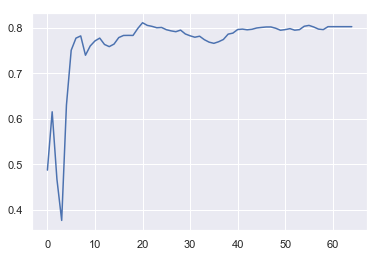

In [209]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(65)]);